In [2]:
!pip install pandas

Defaulting to user installation because normal site-packages is not writeable


In [3]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import requests
import json
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import seaborn as sns
from sklearn.model_selection import GridSearchCV 
from sklearn.model_selection import cross_val_score 
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from pickle import dump
from sklearn.ensemble import RandomForestRegressor



In [4]:
#off_set = 0
#all_data = []
#for i in range(100) :
#    url = f'https://api.rentcast.io/v1/properties?state=FL&limit=500&offset={off_set}'  
#
#    headers = {
#    "Accept" : "application/json",
#    "X-API-Key":"dcc30d3e7e454610af41d9e6ddddeea7"
#}
#
#    response  = requests.get(url, headers = headers)
#
#    if response.status_code == 200:
#        data = response.json()
#        all_data.extend(data)
#        
#    else:
#        print(f"Error {response.status_code} - {response.text}")
#    
#    off_set += 500
#
#df = pd.json_normalize(all_data)
#df.to_csv("data.csv", index = False)

In [5]:
data = pd.read_csv("./data.csv", )

/tmp/ipykernel_129081/659317277.py:1: DtypeWarning: Columns (31) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("./data.csv", )


In [6]:
data.shape

(145618, 35)

In [7]:
data.columns

Index(['id', 'formattedAddress', 'city', 'state', 'zipCode', 'county',
       'latitude', 'longitude', 'propertyType', 'bedrooms', 'bathrooms',
       'squareFootage', 'lotSize', 'yearBuilt', 'subdivision', 'zoning',
       'lastSaleDate', 'lastSalePrice', 'hoa', 'architectureType', 'cooling',
       'coolingType', 'heating', 'heatingType', 'exteriorType', 'fireplace',
       'floorCount', 'foundationType', 'garage', 'garageSpaces', 'garageType',
       'pool', 'roomCount', 'unitCount', 'viewType'],
      dtype='object')

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145618 entries, 0 to 145617
Data columns (total 35 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                145618 non-null  object 
 1   formattedAddress  145618 non-null  object 
 2   city              145618 non-null  object 
 3   state             145618 non-null  object 
 4   zipCode           145618 non-null  int64  
 5   county            145496 non-null  object 
 6   latitude          145618 non-null  float64
 7   longitude         145618 non-null  float64
 8   propertyType      143305 non-null  object 
 9   bedrooms          126304 non-null  float64
 10  bathrooms         128000 non-null  float64
 11  squareFootage     130282 non-null  float64
 12  lotSize           128261 non-null  float64
 13  yearBuilt         127155 non-null  float64
 14  subdivision       117945 non-null  object 
 15  zoning            86565 non-null   object 
 16  lastSaleDate      14

In [9]:
data.isnull().sum()

id                       0
formattedAddress         0
city                     0
state                    0
zipCode                  0
county                 122
latitude                 0
longitude                0
propertyType          2313
bedrooms             19314
bathrooms            17618
squareFootage        15336
lotSize              17357
yearBuilt            18463
subdivision          27673
zoning               59053
lastSaleDate             0
lastSalePrice           84
hoa                 134625
architectureType    108384
cooling                  0
coolingType          65840
heating                  0
heatingType          78930
exteriorType         56299
fireplace                0
floorCount           52683
foundationType      103245
garage                   0
garageSpaces        126851
garageType           73099
pool                     0
roomCount           134914
unitCount            49351
viewType            138906
dtype: int64

In [10]:
data = data.drop_duplicates()

In [11]:
to_drop = data.isnull().sum()
data = data.drop(columns=to_drop[to_drop > 49000].index)


In [12]:
data.isnull().sum()

id                      0
formattedAddress        0
city                    0
state                   0
zipCode                 0
county                122
latitude                0
longitude               0
propertyType         2313
bedrooms            19314
bathrooms           17618
squareFootage       15336
lotSize             17357
yearBuilt           18463
subdivision         27673
lastSaleDate            0
lastSalePrice          84
cooling                 0
heating                 0
fireplace               0
garage                  0
pool                    0
dtype: int64

In [13]:
pd.set_option('display.max_columns', None)
data.describe(include='all').loc[["mean"]].round()

mean = data.describe(include='all').loc[["mean"]].round()

for col in data.columns:
     if col in mean.columns:
         if pd.api.types.is_numeric_dtype(data[col]):
              data[col] = data[col].fillna(mean[col].values[0])


In [14]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [15]:
data.isnull().sum()

id                      0
formattedAddress        0
city                    0
state                   0
zipCode                 0
county                122
latitude                0
longitude               0
propertyType         2313
bedrooms                0
bathrooms               0
squareFootage           0
lotSize                 0
yearBuilt               0
subdivision         27673
lastSaleDate            0
lastSalePrice           0
cooling                 0
heating                 0
fireplace               0
garage                  0
pool                    0
dtype: int64

In [16]:
to_drop = data.isnull().sum()
data = data.drop(columns=to_drop[to_drop > 0].index)

In [17]:
data.head()

,id,formattedAddress,city,state,zipCode,latitude,longitude,bedrooms,bathrooms,squareFootage,lotSize,yearBuilt,lastSaleDate,lastSalePrice,cooling,heating,fireplace,garage,pool
0,"13931-Osprey-Links-Rd,-Orlando,-FL-32837","13931 Osprey Links Rd, Orlando, FL 32837",Orlando,FL,32837,28.363776,-81.418356,2.0,2.0,27160.0,1205181.0,1996.0,2024-06-27T00:00:00.000Z,100594000.0,True,True,False,True,False
1,"3896-Hammock-Bluff-Dr,-Jacksonville,-FL-32226","3896 Hammock Bluff Dr, Jacksonville, FL 32226",Jacksonville,FL,32226,30.473953,-81.553593,4.0,3.0,2345.0,7190.0,2018.0,2024-06-27T00:00:00.000Z,359900.0,True,True,False,True,False
2,"2153-Sw-Newport-Isles-Blvd,-Port-Saint-Lucie,-...","2153 Sw Newport Isles Blvd, Port Saint Lucie, ...",Port Saint Lucie,FL,34953,27.255187,-80.407685,3.0,2.5,1938.0,6036.0,2006.0,2024-06-27T00:00:00.000Z,380000.0,True,True,False,True,False
3,"56-North-St,-Mary-Esther,-FL-32569","56 North St, Mary Esther, FL 32569",Mary Esther,FL,32569,30.410768,-86.673981,3.0,2.0,1439.0,7646.0,1988.0,2024-06-27T00:00:00.000Z,310000.0,True,True,True,True,False
4,"17525-Circle-Pond-Ct,-Boca-Raton,-FL-33496","17525 Circle Pond Ct, Boca Raton, FL 33496",Boca Raton,FL,33496,26.414345,-80.202314,5.0,6.5,5063.0,11443.0,2002.0,2024-06-27T00:00:00.000Z,2000000.0,True,True,False,True,True


In [18]:
data.drop(columns = ["id",	"formattedAddress",	"city",	"state", "lastSaleDate", "pool"], inplace=True)

In [19]:
data.head()

,zipCode,latitude,longitude,bedrooms,bathrooms,squareFootage,lotSize,yearBuilt,lastSalePrice,cooling,heating,fireplace,garage
0,32837,28.363776,-81.418356,2.0,2.0,27160.0,1205181.0,1996.0,100594000.0,True,True,False,True
1,32226,30.473953,-81.553593,4.0,3.0,2345.0,7190.0,2018.0,359900.0,True,True,False,True
2,34953,27.255187,-80.407685,3.0,2.5,1938.0,6036.0,2006.0,380000.0,True,True,False,True
3,32569,30.410768,-86.673981,3.0,2.0,1439.0,7646.0,1988.0,310000.0,True,True,True,True
4,33496,26.414345,-80.202314,5.0,6.5,5063.0,11443.0,2002.0,2000000.0,True,True,False,True


In [20]:
data.shape

(145617, 13)

In [21]:
data[["cooling","heating","fireplace","garage"]] = data[["cooling",	"heating",	"fireplace",	"garage"]].map(lambda x: 1 if x is True else (0 if x is False else x)) 

In [22]:
data.head()

,zipCode,latitude,longitude,bedrooms,bathrooms,squareFootage,lotSize,yearBuilt,lastSalePrice,cooling,heating,fireplace,garage
0,32837,28.363776,-81.418356,2.0,2.0,27160.0,1205181.0,1996.0,100594000.0,1,1,0,1
1,32226,30.473953,-81.553593,4.0,3.0,2345.0,7190.0,2018.0,359900.0,1,1,0,1
2,34953,27.255187,-80.407685,3.0,2.5,1938.0,6036.0,2006.0,380000.0,1,1,0,1
3,32569,30.410768,-86.673981,3.0,2.0,1439.0,7646.0,1988.0,310000.0,1,1,1,1
4,33496,26.414345,-80.202314,5.0,6.5,5063.0,11443.0,2002.0,2000000.0,1,1,0,1


In [23]:
from sklearn.model_selection import train_test_split

X = data.drop("lastSalePrice", axis =1)
y = data['lastSalePrice']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42 )


X_train.head()



,zipCode,latitude,longitude,bedrooms,bathrooms,squareFootage,lotSize,yearBuilt,cooling,heating,fireplace,garage
47269,33880,28.014690,-81.719154,3.0,1.0,1200.0,7270.0,1954.0,0,0,0,0
77296,33542,28.232289,-82.202131,2.0,2.0,684.0,3825.0,1973.0,1,1,0,1
70486,32092,29.934380,-81.443823,3.0,2.0,1737.0,7841.0,2021.0,1,1,0,0
43557,33027,25.999738,-80.356891,3.0,2.0,1687.0,3958.0,1997.0,1,0,0,1
21738,32712,28.688271,-81.534893,3.0,2.0,1873.0,7082.0,2003.0,1,1,0,1


In [24]:
y_train.describe()

count    1.164930e+05
mean     6.231303e+05
std      2.230575e+06
min      3.000000e+02
25%      2.600000e+05
50%      3.776570e+05
75%      5.550000e+05
max      2.880000e+08
Name: lastSalePrice, dtype: float64

In [25]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


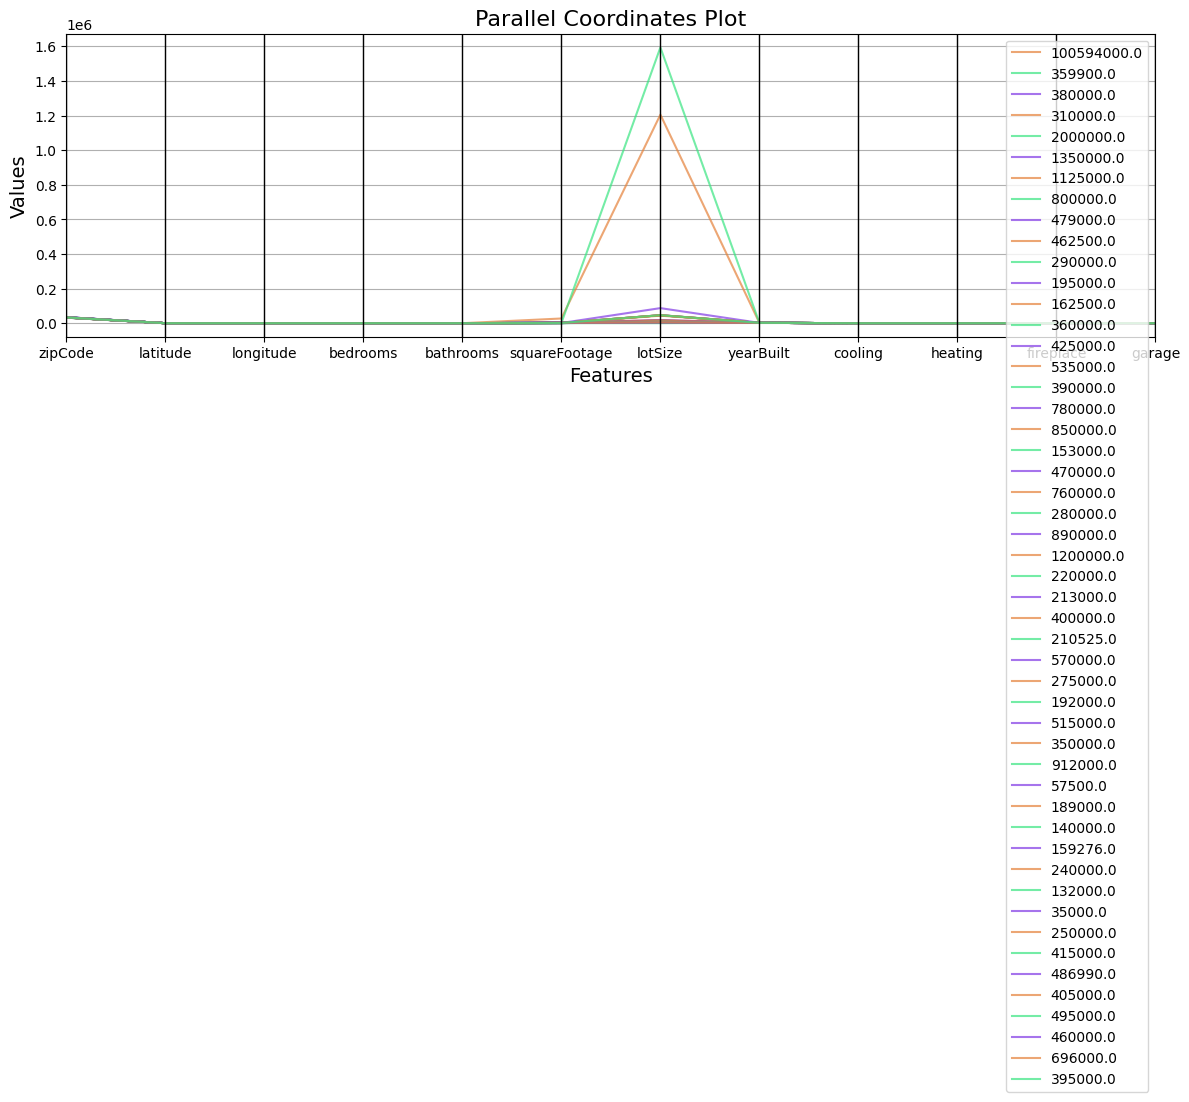

In [26]:
plt.figure(figsize=(12, 8)) 
pd.plotting.parallel_coordinates(data.head(50),class_column="lastSalePrice", color = ("#E58139", "#39E581", "#8139E5"), alpha=0.7)
plt.title('Parallel Coordinates Plot', fontsize=16)  
plt.xlabel('Features', fontsize=14)  
plt.ylabel('Values', fontsize=14)  

plt.tight_layout()

In [27]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor(max_depth=5, random_state = 42)
model.fit(X_train_scaled, y_train)

DecisionTreeRegressor(max_depth=5, random_state=42)

In [28]:
y_pred = model.predict(X_test_scaled)
y_pred

array([461067.33383195, 595125.8766631 , 595125.8766631 , ...,
       595125.8766631 , 461067.33383195, 461067.33383195], shape=(29124,))

In [29]:
mse = mean_squared_error(y_test, y_pred)
mse

6953248227138.26

In [30]:
r2 = r2_score(y_test, y_pred)
r2

0.06571135051695143

In [31]:
mae = mean_absolute_error(y_test, y_pred)
mae

396746.0241392478

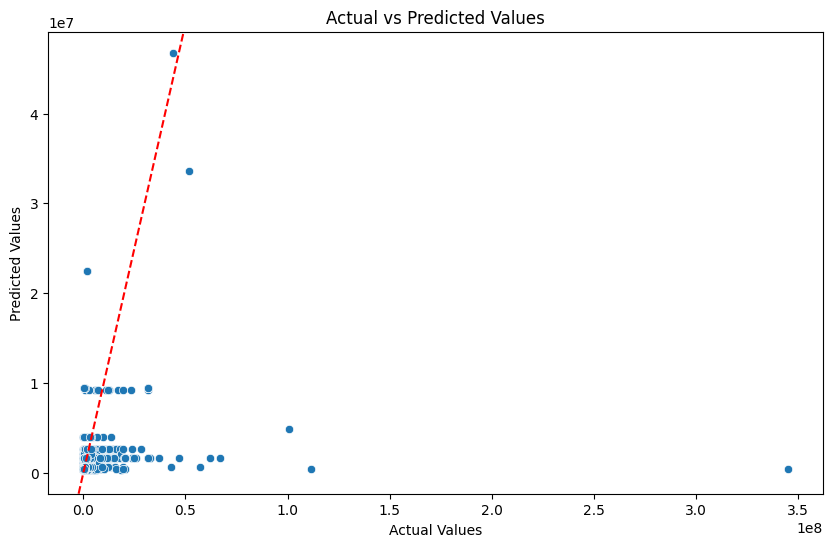

In [32]:
plt.figure(figsize=(10, 6))  
sns.scatterplot(x=y_test, y=y_pred)  
plt.xlabel("Actual Values")  
plt.ylabel("Predicted Values")  
plt.title("Actual vs Predicted Values")  
plt.axline((0, 0), slope=1, color='r', linestyle='--')  # 45-degree line  
plt.show()

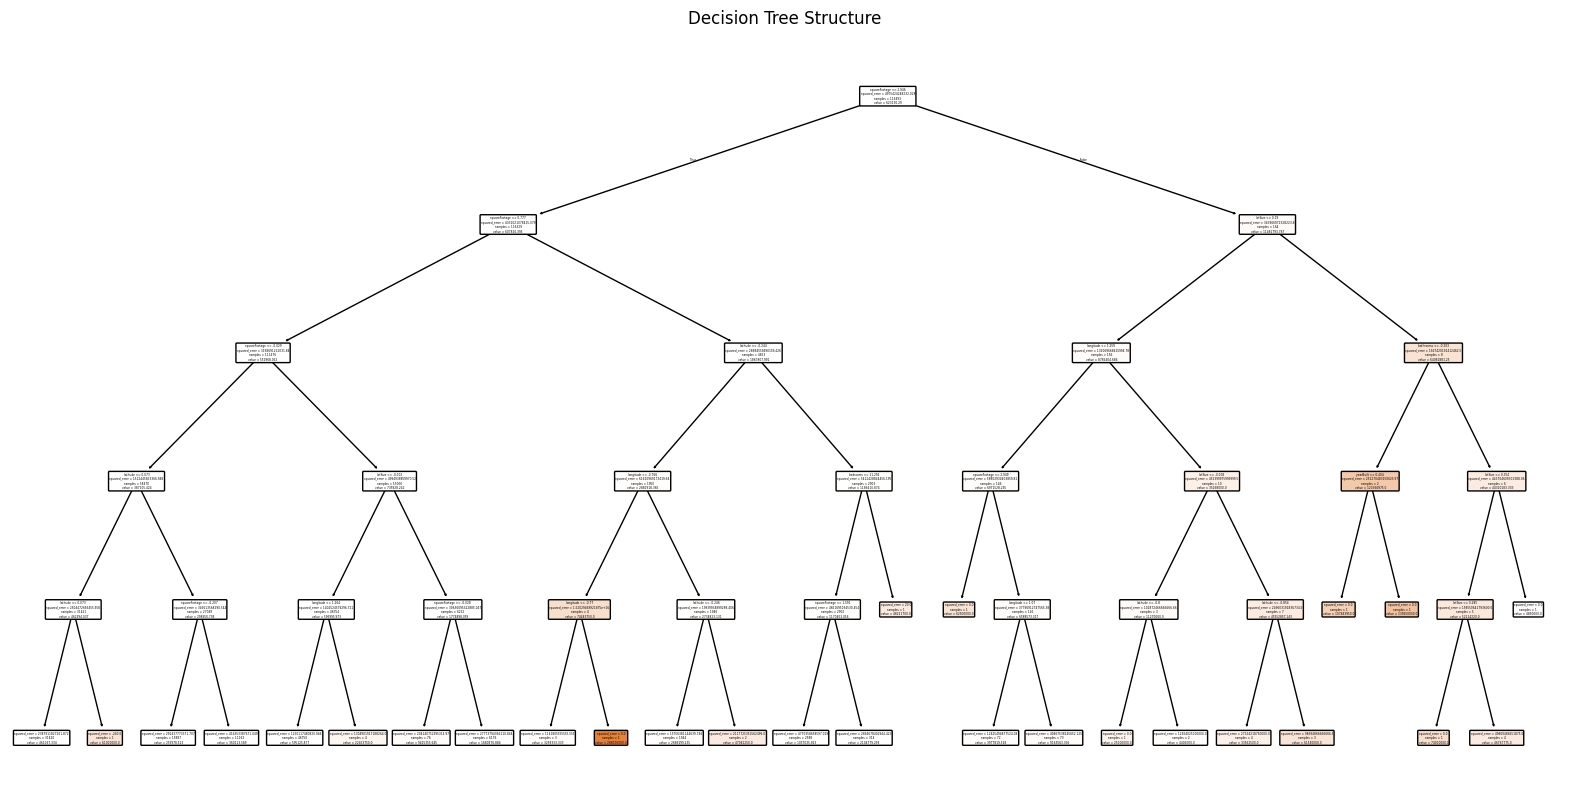

In [33]:
from sklearn.tree import plot_tree  

plt.figure(figsize=(20, 10))  
plot_tree(model, filled=True, feature_names=X.columns, rounded=True)  
plt.title("Decision Tree Structure")  
plt.show() 

Do I need to run again to improve it? or it is already an answer?

In [34]:
param_grid = {  
    'max_depth': [None, 5, 10, 15, 20],    
    'min_samples_split': [2, 5, 10],  
    'min_samples_leaf': [1, 2, 4]  
} 


grid_search = GridSearchCV(DecisionTreeRegressor(random_state=42), param_grid, cv=5, scoring="r2")
grid_search.fit(X_train_scaled, y_train)

best_model = grid_search.best_estimator_
grid_search.best_params_

{'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10}

In [35]:
grid_search.best_score_

np.float64(0.1882203273101273)

In [36]:
scores = cross_val_score(model, X,y,cv=5)
scores

array([ 0.16250709,  0.0104376 , -0.02086187, -1.11396755,  0.17676155])

In [37]:
dump(model, open("decision_tree_regressor_default_42.sav", "wb"))

I am now going to Random Forest Regression

In [38]:
model = RandomForestRegressor(n_estimators = 300, random_state=42,  n_jobs=-1)
model.fit(X_train_scaled, y_train)

KeyboardInterrupt: 

In [ ]:
y_pred = model.predict(X_test_scaled)
y_pred

array([298575.  , 424760.49, 542060.  , ..., 856503.9 , 386419.  ,
       339687.  ], shape=(29124,))

In [ ]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mse

6081314784278.572

In [ ]:
r2

0.18287062516918995

In [ ]:
param_grid = {
    'n_estimators': [50, 100],  
    'max_depth': [10, 20, None],  
    'min_samples_split': [5, 10],  
    'min_samples_leaf': [2, 4] 
}
grid_search_forest = GridSearchCV(model, param_grid, scoring= "r2", cv = 5, n_jobs=-1, verbose=1)
grid_search_forest.fit(X_train_scaled, y_train)
grid_search.best_params_

Fitting 5 folds for each of 24 candidates, totalling 120 fits


KeyboardInterrupt: 

In [ ]:
grid_search.best_score_

In [ ]:
best_model = grid_search.best_estimator_

y_pred_best = best_model.predict(X_test_scaled)

mse_best = mean_squared_error(y_test, y_pred_best)
r2_best = r2_score(y_test, y_pred_best)
r2_best

In [ ]:
mse_best

In [ ]:
from xgboost import XGBRegressor

Boosting Algorithm